- relativePower = False
- removeNoise = True
- applyPCA = False

Train/Validation animals = ['S7074', 'S7072', 'S7071', 'S7070', 'S7069', 'S7068', 'S7064']  
S7074 and S7068 has one baseline 1 brain state file.    

- Using Stratified Group K-Fold with 5 cv folds. 
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedGroupKFold.html
- Discarding the seizure epochs. 

In [3]:
from LoadData import LoadData
from FilterBasic import Filter
from FrequencyDomainFeatures import FrequencyDomainFeatures
from TimeDomainFeatures import TimeDomainFeatures
from FeaturesData import FeaturesData

In [4]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import multilabel_confusion_matrix

In [5]:
directory = "/Volumes/Macintosh HD/Users/gokceuzun/Desktop/4. SENE/Honors Project"
filename = "S7074_WT.npy"
data = LoadData(directory=directory, filename=filename, start=35862289, end=57496848)
unfiltered_data = data.get_dat()
unfiltered_data = data.slice_data(unfiltered_data)

fltr_instance = Filter(unfiltered_data, channels=[3,12,5,9,4,11,1])

features = FeaturesData(
    fltr_instance,
    relativePower=False,
    removeNoise=True,
    applyPCA=False,
    brainstatefile="S7074_BL1.pkl")

animal = ['S7074' for i in range(len(features))]
features['animal'] = animal

Xy_S7074 = features

In [6]:
directory = "/Volumes/Macintosh HD/Users/gokceuzun/Desktop/4. SENE/Honors Project"
filename = "S7072_GAP.npy"
data = LoadData(directory=directory, filename=filename, start=16481329, end=38115888)
unfiltered_data = data.get_dat()
unfiltered_data = data.slice_data(unfiltered_data)

fltr_instance = Filter(unfiltered_data, channels=[3,12,5,9,4,11,1])

features = FeaturesData(
    fltr_instance,
    relativePower=False,
    removeNoise=True,
    applyPCA=False,
    brainstatefile="S7072_BL1.pkl")

animal = ['S7072' for i in range(len(features))]
features['animal'] = animal

Xy_S7072 = features

In [7]:
directory = "/Volumes/Macintosh HD/Users/gokceuzun/Desktop/4. SENE/Honors Project"
filename = "S7071_WT.npy"
data = LoadData(directory=directory, filename=filename, start=16481329, end=38115888)
unfiltered_data = data.get_dat()
unfiltered_data = data.slice_data(unfiltered_data)

fltr_instance = Filter(unfiltered_data, channels=[3,12,5,9,4,11,1])

features = FeaturesData(
    fltr_instance,
    relativePower=False,
    removeNoise=True,
    applyPCA=False,
    brainstatefile="S7071_BL1.pkl")

animal = ['S7071' for i in range(len(features))]
features['animal'] = animal

Xy_S7071 = features

In [8]:
filename = "S7064_GAP.npy"
data = LoadData(directory=directory, filename=filename, start=15324481, end=36959040)
unfiltered_data = data.get_dat()
unfiltered_data = data.slice_data(unfiltered_data)

fltr_instance = Filter(unfiltered_data, channels=[3,12,5,9,4,11,1])

features = FeaturesData(
    fltr_instance,
    relativePower=False,
    removeNoise=True,
    applyPCA=False,
    brainstatefile="S7064_BL1.pkl")

animal = ['S7064' for i in range(len(features))]
features['animal'] = animal

Xy_S7064 = features

In [9]:
filename = "S7069_GAP.npy"
data = LoadData(directory=directory, filename=filename, start=12214513, end=33849072)
unfiltered_data = data.get_dat()
unfiltered_data = data.slice_data(unfiltered_data)

fltr_instance = Filter(unfiltered_data, channels=[3,12,5,9,4,11,1])

features = FeaturesData(
    fltr_instance,
    relativePower=False,
    removeNoise=True,
    applyPCA=False,
    brainstatefile="S7069_BL1.pkl")

animal = ['S7069' for i in range(len(features))]
features['animal'] = animal

Xy_S7069 = features

In [10]:
filename = "S7068_WT.npy"
data = LoadData(directory=directory, filename=filename, start=12214513, end=33849072)
unfiltered_data = data.get_dat()
unfiltered_data = data.slice_data(unfiltered_data)

fltr_instance = Filter(unfiltered_data, channels=[3,12,5,9,4,11,1])

features = FeaturesData(
    fltr_instance,
    relativePower=False,
    removeNoise=True,
    applyPCA=False,
    brainstatefile="S7068_BL1.pkl")

animal = ['S7068' for i in range(len(features))]
features['animal'] = animal

Xy_S7068 = features

In [11]:
filename = "S7070_WT.npy"
data = LoadData(directory=directory, filename=filename, start=16481329, end=38115888)
unfiltered_data = data.get_dat()
unfiltered_data = data.slice_data(unfiltered_data)

fltr_instance = Filter(unfiltered_data, channels=[3,12,5,9,4,11,1])

features = FeaturesData(
    fltr_instance,
    relativePower=False,
    removeNoise=True,
    applyPCA=False,
    brainstatefile="S7070_BL1.pkl")

animal = ['S7070' for i in range(len(features))]
features['animal'] = animal

Xy_S7070 = features

- Test = ['S7075', 'S7063']

In [12]:
directory = "/Volumes/Macintosh HD/Users/gokceuzun/Desktop/4. SENE/Honors Project"
filename = "S7075_GAP.npy"
data = LoadData(directory=directory, filename=filename, start=14227729, end=35862288)
unfiltered_data = data.get_dat()
unfiltered_data = data.slice_data(unfiltered_data)

fltr_instance = Filter(unfiltered_data, channels=[3,12,5,9,4,11,1])

features = FeaturesData(
    fltr_instance,
    relativePower=False,
    removeNoise=True,
    applyPCA=False,
    brainstatefile="S7075_BL1.pkl")

animal = ['S7075' for i in range(len(features))]
features['animal'] = animal

Xy_S7075 = features

In [13]:
directory = "/Volumes/Macintosh HD/Users/gokceuzun/Desktop/4. SENE/Honors Project"
filename = "S7063_GAP.npy"
data = LoadData(directory=directory, filename=filename, start=15324481, end=36959040)
unfiltered_data = data.get_dat()
unfiltered_data = data.slice_data(unfiltered_data)

fltr_instance = Filter(unfiltered_data, channels=[3,12,5,9,4,11,1])

features = FeaturesData(
    fltr_instance,
    relativePower=False,
    removeNoise=True,
    applyPCA=False,
    brainstatefile="S7063_BL1.pkl")

animal = ['S7063' for i in range(len(features))]
features['animal'] = animal

Xy_S7063 = features

## First two classes
- Cross validation for hyperparameter optimization and model paramater selection for testing.  
- First classify wake and non-rem (two classes). And then introduce the third class REM and see how the model performs. If the classifier disregards it, because it occurs rarely due to the imbalance of the classes - downsample wake and non-rem, oversample or introduce cost to REM (SMOTE).

In [131]:
Xy1 = pd.concat([Xy_S7074, Xy_S7072, Xy_S7071, Xy_S7070, Xy_S7069, Xy_S7068, Xy_S7064], axis=0)
Xy1 = Xy1.loc[(Xy1['brainstate'] != 2) & (Xy1['brainstate'] != 4)].reset_index() # disregard seizure and rem

groups_train1 = Xy1.animal
y_train1 = Xy1.brainstate
X_train1 = Xy1.loc[:, ~Xy1.columns.isin(['animal', 'brainstate', 'index'])]

In [132]:
Xy_test1 = pd.concat([Xy_S7075, Xy_S7063], axis=0)

Xy_test1 = Xy_test1.loc[(Xy_test1['brainstate'] != 4) & (Xy_test1['brainstate'] != 2)].reset_index() # disregard seizure and rem

groups_test1 = Xy_test1.animal
y_test1 = Xy_test1.brainstate
X_test1 = Xy_test1.loc[:, ~Xy_test1.columns.isin(['animal', 'brainstate', 'index'])]

### NAIVE BAYES
#### Gaussian Naive Bayes

In [136]:
cross_validate(GaussianNB(), X_train1, y_train1, cv=5, scoring='accuracy', 
               groups=groups_train1, n_jobs=-1, return_train_score=True)

{'fit_time': array([0.23567605, 0.31564808, 0.31324911, 0.23836398, 0.29686403]),
 'score_time': array([0.04313803, 0.03421617, 0.03455114, 0.04246902, 0.03471613]),
 'test_score': array([0.49979695, 0.43116751, 0.41746193, 0.46203046, 0.47700508]),
 'train_score': array([0.4510533 , 0.4701269 , 0.46520305, 0.45098985, 0.4503934 ])}

In [14]:
gnb = GaussianNB()
start = time.time()
gnb.fit(X_train1, y_train1)
accuracy = gnb.score(X_test1, y_test1) # Baseline
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.4382349561420309
Execution time: 0.18659615516662598


In [137]:
# Standardize data mean=0 and stdev=1
stand_scaler = StandardScaler()
stand_X_train1 = stand_scaler.fit_transform(X_train1)
stand_X_test1 = stand_scaler.transform(X_test1)

cross_validate(GaussianNB(), stand_X_train1, y_train1, cv=5, scoring='accuracy', 
               groups=groups_train1, n_jobs=-1, return_train_score=True)

{'fit_time': array([0.65364504, 0.6480341 , 0.49888182, 0.62676811, 0.74415588]),
 'score_time': array([0.0962348 , 0.05950117, 0.14272404, 0.0933609 , 0.12469411]),
 'test_score': array([0.51553299, 0.45573604, 0.43055838, 0.47736041, 0.50619289]),
 'train_score': array([0.47265228, 0.4959264 , 0.4835533 , 0.46879442, 0.46833756])}

In [138]:
gnb = GaussianNB()
start = time.time()
gnb.fit(stand_X_train1, y_train1)
accuracy = gnb.score(stand_X_test1, y_test1) # Standardized
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.4592637989811162
Execution time: 0.25887012481689453


In [139]:
# Normalize data between 0 and 1
norm_scaler = MinMaxScaler()
norm_X_train1 = norm_scaler.fit_transform(X_train1)
norm_X_test1 = norm_scaler.transform(X_test1)

cross_validate(GaussianNB(), norm_X_train1, y_train1, cv=5, scoring='accuracy', 
               groups=groups_train1, n_jobs=-1, return_train_score=True)

{'fit_time': array([0.34162498, 0.32994199, 0.31812191, 0.32199311, 0.32510519]),
 'score_time': array([0.04781389, 0.04633999, 0.04454303, 0.05828118, 0.05800605]),
 'test_score': array([0.51553299, 0.45573604, 0.43055838, 0.47736041, 0.50619289]),
 'train_score': array([0.47257614, 0.49593909, 0.4835533 , 0.46876904, 0.46832487])}

In [16]:
gnb = GaussianNB()
start = time.time()
gnb.fit(norm_X_train1, y_train1)
accuracy = gnb.score(norm_X_test1, y_test1) # Normalized
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.4592637989811162
Execution time: 0.14034390449523926


In [17]:
# Standardized and normalized data performed the same, greater accuracy compared to baseline Gaussian.

#### Complement Naive Bayes

In [142]:
cross_validate(ComplementNB(), norm_X_train1, y_train1, cv=5, scoring='accuracy', 
               groups=groups_train1, n_jobs=-1, return_train_score=True)

{'fit_time': array([0.20782185, 0.20729709, 0.19539905, 0.18695807, 0.18153119]),
 'score_time': array([0.00905919, 0.00704503, 0.00662494, 0.0094111 , 0.00802684]),
 'test_score': array([0.83659898, 0.88116751, 0.86619289, 0.86045685, 0.78309645]),
 'train_score': array([0.84982234, 0.83720812, 0.84305838, 0.84253807, 0.86321066])}

In [18]:
cnb = ComplementNB()
start = time.time()
cnb.fit(norm_X_train1, y_train1)
accuracy = cnb.score(norm_X_test1, y_test1) # Baseline
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8502700425173325
Execution time: 0.044216156005859375


In [19]:
# Complement Naive Bayes performed better than Gaussian Naive Bayes - imbalanced classes.
# Performed on normalized data. 

##### Hyperparameter tuning

In [150]:
param_grid = dict()
param_grid['alpha'] = [4e-08, 3e-08, 5e-08, 2e-07, 6e-06, 5e-05, 25e-04, 4.5e-08, 3.99e-08, 0.00005, 0.0001, 0.5, 1, 1.75, 10]
param_grid['fit_prior'] = [True, False]
param_grid['class_prior'] = [[0.0002,0.00005], [0.003,0.0003], [0.0005,0.000025], [1,2], [0.001, 0.0001], [0.00025, 5.5e-08]]
param_grid['norm'] = [True, False]

start = time.time()
grd1 = GridSearchCV(ComplementNB(), param_grid, scoring='accuracy', n_jobs=-1, cv=5) # 5-fold stratified cv
grd1.fit(norm_X_train1, y_train1)
end = time.time()

grd1.best_params_

{'alpha': 4e-08,
 'class_prior': [0.0002, 5e-05],
 'fit_prior': True,
 'norm': False}

In [151]:
print("Hyperparameter tuning computation time: " + str(end-start))

Hyperparameter tuning computation time: 60.22247910499573


In [152]:
# Evaluation of the model
cross_validate(grd1.best_estimator_, norm_X_train1, y_train1, cv=5, scoring='accuracy', 
               groups=groups_train1, n_jobs=-1, return_train_score=True)

{'fit_time': array([0.17542696, 0.17270613, 0.17237306, 0.1813128 , 0.16172886]),
 'score_time': array([0.00871897, 0.01187086, 0.01179409, 0.01110315, 0.00992417]),
 'test_score': array([0.83685279, 0.88126904, 0.86609137, 0.86071066, 0.78335025]),
 'train_score': array([0.85013959, 0.83746193, 0.84323604, 0.84258883, 0.86329949])}

In [153]:
cnb1 = grd1.best_estimator_
start = time.time()
cnb1.fit(norm_X_train1, y_train1)
accuracy = cnb1.score(norm_X_test1, y_test1)
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.850346650323668
Execution time: 0.038796186447143555


### RANDOM FOREST

In [154]:
cross_validate(RandomForestClassifier(), X_train1, y_train1, cv=5, scoring='accuracy', 
               groups=groups_train1, n_jobs=-1, return_train_score=True)

{'fit_time': array([111.26130891, 110.52076602, 107.10826612, 108.28575993,
        110.51978207]),
 'score_time': array([0.30120277, 0.30522609, 0.36434579, 0.38453913, 0.33081794]),
 'test_score': array([0.89994924, 0.90913706, 0.91817259, 0.89548223, 0.82060914]),
 'train_score': array([1.        , 1.        , 1.        , 0.99998731, 1.        ])}

In [23]:
rf = RandomForestClassifier()
start = time.time()
rf.fit(X_train1, y_train1)
accuracy = rf.score(X_test1, y_test1) # Baseline
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8799555674723254
Execution time: 94.95484685897827


In [155]:
cross_validate(RandomForestClassifier(), norm_X_train1, y_train1, cv=5, scoring='accuracy', 
               groups=groups_train1, n_jobs=-1, return_train_score=True)

{'fit_time': array([94.17474794, 93.61884069, 90.86870503, 90.70726609, 93.85340714]),
 'score_time': array([0.26247501, 0.27358007, 0.33266282, 0.34184384, 0.27251482]),
 'test_score': array([0.89284264, 0.90436548, 0.91629442, 0.90416244, 0.81563452]),
 'train_score': array([1.        , 0.99998731, 0.99994924, 0.99998731, 0.99998731])}

In [24]:
rf = RandomForestClassifier()
start = time.time()
rf.fit(norm_X_train1, y_train1)
accuracy = rf.score(norm_X_test1, y_test1) # Normalized
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8853947217221435
Execution time: 90.06905174255371


In [158]:
cross_validate(RandomForestClassifier(), stand_X_train1, y_train1, cv=5, scoring='accuracy', 
               groups=groups_train1, n_jobs=-1, return_train_score=True)

{'fit_time': array([107.86276102, 106.10831499, 103.85174084, 104.73891783,
        106.99156117]),
 'score_time': array([0.29733205, 0.29118013, 0.33815598, 0.34682798, 0.30385375]),
 'test_score': array([0.90045685, 0.9086802 , 0.91893401, 0.89329949, 0.81969543]),
 'train_score': array([1.        , 0.99997462, 1.        , 0.99998731, 0.99997462])}

In [25]:
rf = RandomForestClassifier()
start = time.time()
rf.fit(stand_X_train1, y_train1)
accuracy = rf.score(stand_X_test1, y_test1) # Standardized
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8780020684107711
Execution time: 96.38568782806396


In [26]:
# Normalized data performed the best for RF. 

##### Hyperparameter tuning

In [366]:
param_grid = dict()
param_grid['n_estimators'] = [1000] # 1000 
param_grid['criterion'] = ['entropy']
param_grid['max_depth'] = [20]
#param_grid['min_samples_split'] = [5]
param_grid['min_samples_leaf'] = [50]
#param_grid['min_weight_fraction_leaf'] = [0.0, 2.0, 5.0]
param_grid['max_features'] = ['sqrt']
#param_grid['max_leaf_nodes'] = [2, 5, 10]
#param_grid['min_impurity_decrease'] = [0.0, 2.0, 5.0]
param_grid['bootstrap'] = [True]
#param_grid['oob_score'] = [True, False]
param_grid['n_jobs'] = [-1]
param_grid['random_state'] = [2]
#param_grid['verbose'] = [0, 2, 5]
#param_grid['warm_start'] = [True, False]
param_grid['class_weight'] = [{0:0.75, 1:1.25}, {0:0.8, 1:1.2}]
#param_grid['ccp_alpha'] = [0.0, 2.0]
#param_grid['max_samples'] = [100, 10]

start = time.time()
grd1 = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', n_jobs=-1, cv=5) # 5-fold stratified cv
grd1.fit(norm_X_train1, y_train1)
end = time.time()

grd1.best_params_

{'bootstrap': True,
 'class_weight': {0: 0.75, 1: 1.25},
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'n_estimators': 1000,
 'n_jobs': -1,
 'random_state': 2}

In [367]:
print("Hyperparameter tuning computation time: " + str(end-start))

Hyperparameter tuning computation time: 1315.8688859939575


In [368]:
# Evaluation of the model
cross_validate(grd1.best_estimator_, norm_X_train1, y_train1, cv=5, scoring='accuracy', 
               groups=groups_train1, n_jobs=-1, return_train_score=True)

{'fit_time': array([580.77306128, 578.8369031 , 578.67602611, 573.51438427,
        581.185287  ]),
 'score_time': array([1.43841982, 1.09222388, 1.48117876, 1.32481098, 1.19752812]),
 'test_score': array([0.87715736, 0.90807107, 0.9051269 , 0.91548223, 0.82416244]),
 'train_score': array([0.90130711, 0.89634518, 0.89864213, 0.89696701, 0.92015228])}

In [369]:
rf1 = grd1.best_estimator_
start = time.time()
rf1.fit(norm_X_train1, y_train1)
accuracy = rf1.score(norm_X_test1, y_test1) # Threshold
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8978051863484889
Execution time: 144.77426171302795


## Introduce the third class

In [14]:
Xy2 = pd.concat([Xy_S7074, Xy_S7072, Xy_S7071, Xy_S7070, Xy_S7069, Xy_S7068, Xy_S7064], axis=0)
Xy2 = Xy2.loc[(Xy2['brainstate'] != 4)].reset_index() # disregard seizure and rem

groups_train2 = Xy2.animal
y_train2 = Xy2.brainstate
X_train2 = Xy2.loc[:, ~Xy2.columns.isin(['animal', 'brainstate', 'index'])]

In [15]:
Xy_test2 = pd.concat([Xy_S7075, Xy_S7063], axis=0)

Xy_test2 = Xy_test2.loc[(Xy_test2['brainstate'] != 4)].reset_index() # disregard seizure and rem

groups_test2 = Xy_test2.animal
y_test2 = Xy_test2.brainstate
X_test2 = Xy_test2.loc[:, ~Xy_test2.columns.isin(['animal', 'brainstate', 'index'])]

### NAIVE BAYES
#### Gaussian Naive Bayes

In [168]:
cross_validate(GaussianNB(), X_train2, y_train2, cv=5, scoring='accuracy', 
               groups=groups_train2, n_jobs=-1, return_train_score=True)

{'fit_time': array([0.37903619, 0.37835908, 0.37343693, 0.36819601, 0.34811497]),
 'score_time': array([0.08260202, 0.08073997, 0.07723808, 0.07786298, 0.08390212]),
 'test_score': array([0.44414288, 0.4008627 , 0.39116949, 0.43551592, 0.44777783]),
 'train_score': array([0.42201813, 0.43371056, 0.42900935, 0.41592352, 0.4224422 ])}

In [32]:
gnb = GaussianNB()
start = time.time()
gnb.fit(X_train2, y_train2)
accuracy = gnb.score(X_test2, y_test2) # Baseline
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.4164095319528607
Execution time: 0.23550629615783691


In [169]:
# Standardize data mean=0 and stdev=1
stand_scaler = StandardScaler()
stand_X_train2 = stand_scaler.fit_transform(X_train2)
stand_X_test2 = stand_scaler.transform(X_test2)

cross_validate(GaussianNB(), stand_X_train2, y_train2, cv=5, scoring='accuracy', 
               groups=groups_train2, n_jobs=-1, return_train_score=True)

{'fit_time': array([0.25107002, 0.33403277, 0.32274723, 0.32913804, 0.32775617]),
 'score_time': array([0.04647398, 0.05769515, 0.06186962, 0.06328106, 0.06597614]),
 'test_score': array([0.4846605 , 0.42218776, 0.42020065, 0.46653419, 0.48277032]),
 'train_score': array([0.46019726, 0.4617724 , 0.46342025, 0.44471235, 0.4570712 ])}

In [33]:
gnb = GaussianNB()
start = time.time()
gnb.fit(stand_X_train2, y_train2)
accuracy = gnb.score(stand_X_test2, y_test2) # Standardized
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.43462582252128334
Execution time: 0.2518651485443115


In [170]:
# Normalize data between 0 and 1
norm_scaler = MinMaxScaler()
norm_X_train2 = norm_scaler.fit_transform(X_train2)
norm_X_test2 = norm_scaler.transform(X_test2)

cross_validate(GaussianNB(), norm_X_train2, y_train2, cv=5, scoring='accuracy', 
               groups=groups_train2, n_jobs=-1, return_train_score=True)

{'fit_time': array([0.22701478, 0.22871113, 0.29569292, 0.29289103, 0.28869009]),
 'score_time': array([0.04303718, 0.04274273, 0.04993606, 0.05129504, 0.048177  ]),
 'test_score': array([0.48461203, 0.42213929, 0.42015218, 0.46653419, 0.48257646]),
 'train_score': array([0.46017302, 0.4617724 , 0.46340813, 0.44468812, 0.45701061])}

In [34]:
gnb = GaussianNB()
start = time.time()
gnb.fit(norm_X_train2, y_train2)
accuracy = gnb.score(norm_X_test2, y_test2) # Normalized
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.4346629986244842
Execution time: 0.23488497734069824


In [35]:
# Normalized data performed best with Gaussian NB. 
# Accuracy decreased when third class is introduced. 

#### Complement Naive Bayes

In [498]:
cross_validate(ComplementNB(), norm_X_train2, y_train2, cv=5, scoring='accuracy', 
               groups=groups_train2, n_jobs=-1, return_train_score=True)

{'fit_time': array([0.13551402, 0.22567296, 0.13424301, 0.22596192, 0.20505404]),
 'score_time': array([0.00709701, 0.00795007, 0.00638103, 0.00690722, 0.0084269 ]),
 'test_score': array([0.79193525, 0.82377744, 0.81616827, 0.81064314, 0.73581156]),
 'train_score': array([0.80033199, 0.78754907, 0.79275917, 0.79283187, 0.81592594])}

In [36]:
cnb = ComplementNB()
start = time.time()
cnb.fit(norm_X_train2, y_train2)
accuracy = cnb.score(norm_X_test2, y_test2) # Baseline
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8227815160414885
Execution time: 0.04351305961608887


In [37]:
# Complement NB performes better than Gaussian NB. 
# Accuracy decreased when third class is introduced. 

##### Hyperparameter tuning

In [173]:
param_grid = dict()
param_grid['alpha'] = [4e-08, 3.9e-08, 4.2e-08, 5e-07, 65e-08, 3e-06, 0.75e-05, 0.25e-06, 8e-08, 2e-08]
param_grid['fit_prior'] = [True, False]
param_grid['class_prior'] = [[0.0002,0.00005,0.0003], [0.00025,0.00004,0.0002], [0.0003,0.00003,0.00025], [0.01,0.2,0.008]]
param_grid['norm'] = [True, False]

start = time.time()
grd2 = GridSearchCV(ComplementNB(), param_grid, scoring='accuracy', n_jobs=-1, cv=5) # 5-fold stratified cv
grd2.fit(norm_X_train2, y_train2)
end = time.time()

grd2.best_params_

{'alpha': 4e-08,
 'class_prior': [0.0002, 5e-05, 0.0003],
 'fit_prior': True,
 'norm': False}

In [174]:
print("Hyperparameter tuning computation time: " + str(end-start))

Hyperparameter tuning computation time: 31.354180097579956


In [179]:
# Evaluation of the model
cross_validate(grd2.best_estimator_, norm_X_train2, y_train2, cv=5, scoring='accuracy', 
               groups=groups_train2, n_jobs=-1, return_train_score=True)

{'fit_time': array([0.15991116, 0.15752912, 0.15998316, 0.14434099, 0.15921879]),
 'score_time': array([0.00739098, 0.00951195, 0.00938988, 0.01010394, 0.00912118]),
 'test_score': array([0.79227451, 0.82363205, 0.81607134, 0.81098241, 0.73600543]),
 'train_score': array([0.80046527, 0.78762177, 0.79284399, 0.79291669, 0.81599864])}

In [175]:
cnb2 = grd2.best_estimator_
start = time.time()
cnb2.fit(norm_X_train2, y_train2)
accuracy = cnb1.score(norm_X_test2, y_test2) # Threshold
end = time.time()

y_predNB = cnb2.predict(norm_X_test2)

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8251236105431429
Execution time: 0.03311610221862793


### RANDOM FOREST

In [176]:
cross_validate(RandomForestClassifier(), X_train2, y_train2, cv=5, scoring='accuracy', 
               groups=groups_train2, n_jobs=-1, return_train_score=True)

{'fit_time': array([124.7209878 , 123.43576908, 122.0412848 , 121.2787559 ,
        124.71105599]),
 'score_time': array([0.40444922, 0.46391511, 0.65362024, 0.60045695, 0.43841505]),
 'test_score': array([0.86046624, 0.88629865, 0.8716619 , 0.85033684, 0.78345369]),
 'train_score': array([1.        , 0.99997577, 0.99998788, 0.99996365, 0.99998788])}

In [41]:
rf = RandomForestClassifier()
start = time.time()
rf.fit(X_train2, y_train2)
accuracy = rf.score(X_test2, y_test2) # Baseline
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8431540205955612
Execution time: 124.53621482849121


In [177]:
cross_validate(RandomForestClassifier(), norm_X_train2, y_train2, cv=5, scoring='accuracy', 
               groups=groups_train2, n_jobs=-1, return_train_score=True)

{'fit_time': array([110.9730401 , 108.25531721, 108.52734303, 107.31719923,
        111.96823764]),
 'score_time': array([0.31331182, 0.37125111, 0.41356087, 0.43008995, 0.29779816]),
 'test_score': array([0.85208162, 0.8822275 , 0.86739689, 0.86032085, 0.780158  ]),
 'train_score': array([0.99998788, 1.        , 1.        , 1.        , 0.99998788])}

In [42]:
rf = RandomForestClassifier()
start = time.time()
rf.fit(norm_X_train2, y_train2)
accuracy = rf.score(norm_X_test2, y_test2) # Normalized
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8482843228372802
Execution time: 103.67416501045227


In [178]:
cross_validate(RandomForestClassifier(), stand_X_train2, y_train2, cv=5, scoring='accuracy', 
               groups=groups_train2, n_jobs=-1, return_train_score=True)

{'fit_time': array([119.71690392, 116.39025307, 116.55415702, 115.45285797,
        119.61967301]),
 'score_time': array([0.30856204, 0.35371709, 0.38075304, 0.37110806, 0.28282595]),
 'test_score': array([0.86056318, 0.88542626, 0.87098338, 0.84912519, 0.78296903]),
 'train_score': array([1.        , 0.99998788, 0.99998788, 0.99998788, 1.        ])}

In [43]:
rf = RandomForestClassifier()
start = time.time()
rf.fit(stand_X_train2, y_train2)
accuracy = rf.score(stand_X_test2, y_test2) # Standardized
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8398081713074835
Execution time: 116.17091488838196


In [44]:
# Normalized data performs best. 

##### Hyperparameter tuning

In [370]:
param_grid = dict()
param_grid['n_estimators'] = [1000] # 1000  
param_grid['criterion'] = ['entropy']
param_grid['max_depth'] = [20]
#param_grid['min_samples_split'] = [5]
param_grid['min_samples_leaf'] = [50]
#param_grid['min_weight_fraction_leaf'] = [0.0, 2.0, 5.0]
param_grid['max_features'] = ['sqrt']
#param_grid['max_leaf_nodes'] = [2, 5, 10]
#param_grid['min_impurity_decrease'] = [0.0, 2.0, 5.0]
#param_grid['bootstrap'] = [True, False]
#param_grid['oob_score'] = [True, False]
param_grid['n_jobs'] = [-1]
param_grid['random_state'] = [2]
#param_grid['verbose'] = [0, 2, 5]
#param_grid['warm_start'] = [True, False]
param_grid['class_weight'] = [{0:0.75, 1:1.2, 2:2.5}, {0:0.8, 1:2, 2:2.5}] # balanced
#param_grid['ccp_alpha'] = [0.0, 2.0]
#param_grid['max_samples'] = [100, 10]

start = time.time()
grd2 = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', n_jobs=-1, cv=5) # 5-fold stratified cv
grd2.fit(norm_X_train2, y_train2)
end = time.time()

grd2.best_params_

{'class_weight': {0: 0.75, 1: 1.2, 2: 2.5},
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'n_estimators': 1000,
 'n_jobs': -1,
 'random_state': 2}

In [371]:
print("Hyperparameter tuning computation time: " + str(end-start))

Hyperparameter tuning computation time: 1520.7918763160706


In [372]:
# Evaluation of the model
cross_validate(grd2.best_estimator_, norm_X_train2, y_train2, cv=5, scoring='accuracy', 
               groups=groups_train2, n_jobs=-1, return_train_score=True)

{'fit_time': array([673.47014499, 674.11380768, 678.24771523, 671.07611895,
        680.77241087]),
 'score_time': array([1.78258204, 1.65102696, 1.49595761, 1.247159  , 0.94533181]),
 'test_score': array([0.82624921, 0.87321281, 0.84665342, 0.86793002, 0.78917268]),
 'train_score': array([0.87092279, 0.86093879, 0.86444046, 0.86642757, 0.88918238])}

In [417]:
rf2 = grd2.best_estimator_
start = time.time()
rf2.fit(norm_X_train2, y_train2)
accuracy = rf2.score(norm_X_test2, y_test2) # Threshold
end = time.time()

y_predRF = rf2.predict(norm_X_test2)

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8450500018588052
Execution time: 181.0810489654541


In [ ]:
# Accuracy decreased when third class is introduced. 

##### RF Confusion Matrix

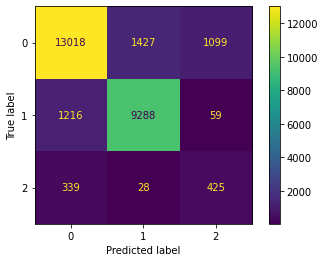

In [538]:
cm = metrics.confusion_matrix(y_test2, y_predRF)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['0','1','2'])
cm_display.plot()
plt.show()

In [539]:
print(classification_report(y_test2, y_predRF, target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86     15544
           1       0.86      0.88      0.87     10563
           2       0.27      0.54      0.36       792

    accuracy                           0.85     26899
   macro avg       0.68      0.75      0.70     26899
weighted avg       0.86      0.85      0.85     26899



In [540]:
precision_recall_fscore_support(y_test2, y_predRF, average='macro')

(0.6754454555007149, 0.7511351276364132, 0.6980856507252152, None)

In [541]:
precision_recall_fscore_support(y_test2, y_predRF, average='micro')

(0.8450500018588052, 0.8450500018588052, 0.8450500018588052, None)

In [542]:
precision_recall_fscore_support(y_test2, y_predRF, average='weighted')

(0.8636158647605197, 0.8450500018588052, 0.852473957498733, None)

In [543]:
precision_recall_fscore_support(y_test2, y_predRF, average=None, labels=[0,1,2]) # for each class 

(array([0.89329582, 0.86456297, 0.26847757]),
 array([0.83749357, 0.87929565, 0.53661616]),
 array([0.86449514, 0.87186708, 0.35789474]),
 array([15544, 10563,   792]))

In [617]:
mcm = multilabel_confusion_matrix(y_test2, y_predRF)

tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
recall = tp / (tp + fn) # true positive rate or sensitivity
specificity = tn / (tn + fp) # ture negative rate
fallout = fp / (fp + tn) # false positive rate
missrate = fn / (fn + tp) #false negative rate

d = {}
for label in ['0', '1', '2']:
    i = int(label)
    d[label] = dict()
    d[label]['TP'] = tp[i]
    d[label]['TN'] = tn[i]
    d[label]['FP'] = fp[i]
    d[label]['FN'] = fn[i]
    d[label]['Accuracy'] = (tp[i]+tn[i])/(tp[i]+tn[i]+fn[i]+fp[i]) # TP+TN / TP+TN+FP+FN
    d[label]['Recall'] = tp[i]/(tp[i]+fn[i]) # TP / TP+FN
    d[label]['Precision'] = tp[i]/(tp[i]+fp[i]) # TP / TP+FP
    d[label]['F1'] = (2*d[label]['Precision']*d[label]['Recall'])/(d[label]['Precision']+d[label]['Recall'])
    d[label]['Specificity'] = tn[i]/(tn[i]+fp[i]) # TN / TN+FP
    #d[label]['Fallout'] = fp[i]/(fp[i]+tn[i]) # FP /FP+TN
    #d[label]['Missrate'] = fn[i]/(fn[i]+tp[i]) # FN / FN+TP
d

{'0': {'TP': 13018,
  'TN': 9800,
  'FP': 1555,
  'FN': 2526,
  'Accuracy': 0.8482843228372802,
  'Recall': 0.837493566649511,
  'Precision': 0.8932958210389076,
  'F1': 0.8644951356376798,
  'Specificity': 0.8630559225011009},
 '1': {'TP': 9288,
  'TN': 14881,
  'FP': 1455,
  'FN': 1275,
  'Accuracy': 0.8985092382616454,
  'Recall': 0.8792956546435672,
  'Precision': 0.8645629712370846,
  'F1': 0.8718670796958604,
  'Specificity': 0.9109329089128305},
 '2': {'TP': 425,
  'TN': 24949,
  'FP': 1158,
  'FN': 367,
  'Accuracy': 0.9433064426186847,
  'Recall': 0.5366161616161617,
  'Precision': 0.26847757422615287,
  'F1': 0.3578947368421053,
  'Specificity': 0.9556440801317654}}

In [588]:
# Class 2
# Low TP and FN - high TN and FP
# High accuracy and specificity
# Low recall, precision and F1

## Oversampling and undersampling

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [19]:
counter = Counter(y_train2)
counter

Counter({0: 60132, 1: 38368, 2: 4665})

In [20]:
print("Class 0: " + str(round(100*counter.get(0)/(counter.get(0)+counter.get(1)+counter.get(2))))+"% of X_train2")
print("Class 1: " + str(round(100*counter.get(1)/(counter.get(0)+counter.get(1)+counter.get(2))))+"% of X_train2")
print("Class 2: " + str(round(100*counter.get(2)/(counter.get(0)+counter.get(1)+counter.get(2))))+"% of X_train2")

Class 0: 58% of X_train2
Class 1: 37% of X_train2
Class 2: 5% of X_train2


In [21]:
# Current class distribution (0,1,2)
# 0 : 58% of the data /3
# 1 : 37% of the data/2
# 2 : 5% of the data *4

# Oversampling - overfit
# Undersampling - information loss

#sampler = RandomOverSampler(sampling_strategy={0: 60132, 1: 50000, 2: 10000})
#sampler = RandomUnderSampler(sampling_strategy={0: 40132, 1: 20000, 2: 4665})
#sampler = SMOTE(sampling_strategy={0: 60132, 1: 50000, 2: 10000})

In [22]:
over = SMOTE(sampling_strategy={0: 60132, 1: 38368, 2: 12000})
under = RandomUnderSampler(sampling_strategy={0: 50000, 1: 35000, 2: 12000})

sampler_pipeline = Pipeline([('o', over), ('u', under)])

X_sampled, y_sampled = sampler_pipeline.fit_resample(X_train2, y_train2)

counter = Counter(y_sampled)
counter

Counter({0: 50000, 1: 35000, 2: 12000})

In [23]:
print("Class 0: " + str(round(100*counter.get(0)/(counter.get(0)+counter.get(1)+counter.get(2))))+"% of X_train2")
print("Class 1: " + str(round(100*counter.get(1)/(counter.get(0)+counter.get(1)+counter.get(2))))+"% of X_train2")
print("Class 2: " + str(round(100*counter.get(2)/(counter.get(0)+counter.get(1)+counter.get(2))))+"% of X_train2")

Class 0: 52% of X_train2
Class 1: 36% of X_train2
Class 2: 12% of X_train2


In [24]:
# Normalize the sampled data
norm_scaler = MinMaxScaler()
norm_X_sampled = norm_scaler.fit_transform(X_sampled)
norm_X_test3 = norm_scaler.transform(X_test2)

###### Complement Naive Bayes

In [689]:
# Hyperparameter tuned model
cnb = ComplementNB(alpha=4e-08, class_prior=[0.0002, 5e-05, 0.0003], fit_prior=True, norm=False)

# Performence evaluation
cross_validate(cnb, norm_X_sampled, y_sampled, cv=5, scoring='accuracy', n_jobs=-1)

{'fit_time': array([0.18769693, 0.18772817, 0.18190908, 0.18319511, 0.18275189]),
 'score_time': array([0.0054121 , 0.00552392, 0.00732374, 0.00605106, 0.00538325]),
 'test_score': array([0.64413793, 0.64551724, 0.64431034, 0.64534483, 0.64094828])}

In [690]:
start = time.time()
cnb.fit(norm_X_sampled, y_sampled)
accuracy = cnb.score(norm_X_test3, y_test2) 
end = time.time()

y_pred = cnb.predict(norm_X_test3)

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.4248856834826574
Execution time: 0.07547903060913086


In [676]:
# The accuracy decreases as I deviate from the original proportions. 

###### Random Forest

In [677]:
# Hyperparameter tuned model
rf = RandomForestClassifier(n_estimators=1000, class_weight={0: 0.75, 1: 1.2, 2: 2.5}, criterion='gini', 
                            max_depth=20, max_features='sqrt', min_samples_leaf=50, n_jobs=-1, random_state=2)

# Performence evaluation
cross_validate(rf, norm_X_sampled, y_sampled, cv=5, scoring='accuracy', n_jobs=-1)

{'fit_time': array([589.91890001, 590.66780305, 590.1276989 , 591.33830905,
        590.82389975]),
 'score_time': array([1.30206895, 1.45951986, 1.51735401, 1.0710969 , 1.4166491 ]),
 'test_score': array([0.84170103, 0.84164948, 0.83742268, 0.8371134 , 0.83814433])}

In [678]:
start = time.time()
rf.fit(norm_X_sampled, y_sampled)
accuracy = rf.score(norm_X_test3, y_test2) 
end = time.time()

y_pred = rf.predict(norm_X_test3)

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.7942302687832261
Execution time: 143.80487394332886


In [679]:
# The accuracy decreased. 

###### RF Confusion Matrix

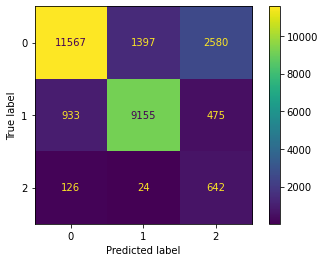

In [680]:
cm = metrics.confusion_matrix(y_test2, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['0','1','2'])
cm_display.plot()
plt.show()

In [681]:
print(classification_report(y_test2, y_pred, target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82     15544
           1       0.87      0.87      0.87     10563
           2       0.17      0.81      0.29       792

    accuracy                           0.79     26899
   macro avg       0.65      0.81      0.66     26899
weighted avg       0.87      0.79      0.82     26899



In [682]:
precision_recall_fscore_support(y_test2, y_pred, average='macro')
precision_recall_fscore_support(y_test2, y_pred, average='micro')
precision_recall_fscore_support(y_test2, y_pred, average='weighted')
precision_recall_fscore_support(y_test2, y_pred, average=None, labels=[0,1,2]) # for each class 

(array([0.91612546, 0.86563918, 0.17365431]),
 array([0.74414565, 0.86670453, 0.81060606]),
 array([0.82122826, 0.86617153, 0.28603252]),
 array([15544, 10563,   792]))

In [683]:
mcm = multilabel_confusion_matrix(y_test2, y_pred)

tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
recall = tp / (tp + fn) # true positive rate or sensitivity
specificity = tn / (tn + fp) # ture negative rate
fallout = fp / (fp + tn) # false positive rate
missrate = fn / (fn + tp) #false negative rate

d = {}
for label in ['0', '1', '2']:
    i = int(label)
    d[label] = dict()
    d[label]['TP'] = tp[i]
    d[label]['TN'] = tn[i]
    d[label]['FP'] = fp[i]
    d[label]['FN'] = fn[i]
    d[label]['Accuracy'] = (tp[i]+tn[i])/(tp[i]+tn[i]+fn[i]+fp[i]) # TP+TN / TP+TN+FP+FN
    d[label]['Recall'] = tp[i]/(tp[i]+fn[i]) # TP / TP+FN
    d[label]['Precision'] = tp[i]/(tp[i]+fp[i]) # TP / TP+FP
    d[label]['F1'] = (2*d[label]['Precision']*d[label]['Recall'])/(d[label]['Precision']+d[label]['Recall'])
    d[label]['Specificity'] = tn[i]/(tn[i]+fp[i]) # TN / TN+FP
    #d[label]['Fallout'] = fp[i]/(fp[i]+tn[i]) # FP /FP+TN
    #d[label]['Missrate'] = fn[i]/(fn[i]+tp[i]) # FN / FN+TP
d

{'0': {'TP': 11567,
  'TN': 10296,
  'FP': 1059,
  'FN': 3977,
  'Accuracy': 0.8127811442804566,
  'Recall': 0.7441456510550695,
  'Precision': 0.9161254554094725,
  'F1': 0.8212282570110047,
  'Specificity': 0.9067371202113607},
 '1': {'TP': 9155,
  'TN': 14915,
  'FP': 1421,
  'FN': 1408,
  'Accuracy': 0.8948288040447601,
  'Recall': 0.8667045346965824,
  'Precision': 0.8656391830559758,
  'F1': 0.866171531292871,
  'Specificity': 0.9130142017629774},
 '2': {'TP': 642,
  'TN': 23052,
  'FP': 3055,
  'FN': 150,
  'Accuracy': 0.8808505892412357,
  'Recall': 0.8106060606060606,
  'Precision': 0.1736543143088991,
  'F1': 0.28603252394742706,
  'Specificity': 0.8829815758225763}}

In [684]:
# 2': {'TP': 425,
#  'TN': 24949,
#  'FP': 1158,
#  'FN': 367,
#  'Accuracy': 0.9433064426186847,
#  'Recall': 0.5366161616161617,
#  'Precision': 0.26847757422615287,
#  'F1': 0.3578947368421053,
#  'Specificity': 0.9556440801317654}

# TP and FP increased
# TN and FN decreased
# Only recall increased - accuracy, precision, F1 and specificity decreased

#### TRYING SOME DIFFERENT METHODS:
https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

- Skewed class weights

In [600]:
rf = RandomForestClassifier(n_estimators=1000, class_weight={0: 5, 1: 0.03, 2: 100}, criterion='gini', 
                            max_depth=20, max_features='sqrt', min_samples_leaf=50, n_jobs=-1, random_state=2)

cross_validate(rf, norm_X_sampled, y_sampled, cv=5, scoring='accuracy', n_jobs=-1)

{'fit_time': array([433.51530027, 433.16524887, 434.62461495, 434.01748586,
        433.08525586]),
 'score_time': array([1.27591181, 1.36543322, 0.63818121, 1.0661912 , 1.43006325]),
 'test_score': array([0.58929412, 0.59058824, 0.58823529, 0.59088235, 0.59170588])}

In [601]:
rf.fit(norm_X_sampled, y_sampled)
accuracy = rf.score(norm_X_test3, y_test2) 
y_pred = rf.predict(norm_X_test3)

print("Accuracy: " + str(accuracy))

Accuracy: 0.44678240826796534


In [602]:
precision_recall_fscore_support(y_test2, y_pred, average=None, labels=[0,1,2]) # for each class 

(array([0.54453422, 0.95726496, 0.11513791]),
 array([0.71976325, 0.01060305, 0.90656566]),
 array([0.62000554, 0.02097378, 0.20432555]),
 array([15544, 10563,   792]))

- Bagging classifier

In [603]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()

cross_validate(model, norm_X_sampled, y_sampled, cv=5, scoring='accuracy', n_jobs=-1)

{'fit_time': array([97.9558661 , 98.18403578, 98.65565729, 99.39162302, 98.74250817]),
 'score_time': array([0.14356089, 0.13010907, 0.13950062, 0.14274001, 0.1447978 ]),
 'test_score': array([0.86252941, 0.85905882, 0.85635294, 0.85564706, 0.85658824])}

In [604]:
model.fit(norm_X_sampled, y_sampled)
accuracy = model.score(norm_X_test3, y_test2) 
y_pred = model.predict(norm_X_test3)

print("Accuracy: " + str(accuracy))

Accuracy: 0.7763113870404105


In [605]:
precision_recall_fscore_support(y_test2, y_pred, average=None, labels=[0,1,2]) # for each class 

(array([0.78020767, 0.84811907, 0.17302573]),
 array([0.86528564, 0.68512733, 0.24621212]),
 array([0.82054723, 0.75795978, 0.20323085]),
 array([15544, 10563,   792]))

- Balanced bagging classifier

In [606]:
from imblearn.ensemble import BalancedBaggingClassifier

model = BalancedBaggingClassifier()

cross_validate(model, norm_X_sampled, y_sampled, cv=5, scoring='accuracy', n_jobs=-1)

{'fit_time': array([35.42229128, 36.46068907, 36.74264789, 36.09050393, 36.45732212]),
 'score_time': array([0.11984992, 0.11902022, 0.13087296, 0.11782193, 0.11952877]),
 'test_score': array([0.84535294, 0.83917647, 0.84088235, 0.84064706, 0.83864706])}

In [607]:
model.fit(norm_X_sampled, y_sampled)
accuracy = model.score(norm_X_test3, y_test2) 
y_pred = model.predict(norm_X_test3)

print("Accuracy: " + str(accuracy))

Accuracy: 0.765641845421763


In [608]:
precision_recall_fscore_support(y_test2, y_pred, average=None, labels=[0,1,2]) # for each class 

(array([0.8573017 , 0.85026632, 0.12534393]),
 array([0.74401698, 0.81605604, 0.51767677]),
 array([0.7966522 , 0.83281001, 0.20182131]),
 array([15544, 10563,   792]))

- Balanced subsample on resampled data

In [609]:
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced_subsample')

cross_validate(model, norm_X_sampled, y_sampled, cv=5, scoring=scoring, n_jobs=-1)

{'fit_time': array([837.26054502, 839.45265818, 838.63481188, 837.78807282,
        842.8383131 ]),
 'score_time': array([4.30715704, 4.13587904, 4.27043509, 4.41578126, 3.43938518]),
 'test_score': array([0.87641176, 0.87311765, 0.87129412, 0.87435294, 0.86894118])}

In [610]:
model.fit(norm_X_sampled, y_sampled)
accuracy = model.score(norm_X_test3, y_test2) 
y_pred = model.predict(norm_X_test3)

print("Accuracy: " + str(accuracy))

Accuracy: 0.8241570318599204


In [611]:
precision_recall_fscore_support(y_test2, y_pred, average=None, labels=[0,1,2]) # for each class 

(array([0.80358744, 0.89365865, 0.18378378]),
 array([0.92228513, 0.73511313, 0.08585859]),
 array([0.85885454, 0.80666944, 0.11703959]),
 array([15544, 10563,   792]))

- Balanced subsample on non-resampled data

In [613]:
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced_subsample')

cross_validate(model, norm_X_train2, y_train2, cv=5, scoring=scoring, n_jobs=-1)

{'fit_time': array([1091.01658106, 1074.88945913, 1069.03841686, 1059.08808708,
        1082.41853166]),
 'score_time': array([3.57234502, 3.60996485, 4.27998328, 4.53523898, 3.51789618]),
 'test_score': array([0.85125769, 0.88372995, 0.86812388, 0.86269568, 0.77904328])}

In [614]:
model.fit(norm_X_train2, y_train2)
accuracy = model.score(norm_X_test2, y_test2) 
y_pred = model.predict(norm_X_test2)

print("Accuracy: " + str(accuracy))

Accuracy: 0.844009070969181


In [615]:
precision_recall_fscore_support(y_test2, y_pred, average=None, labels=[0,1,2]) # for each class 

(array([0.82643916, 0.89023866, 0.19371728]),
 array([0.92543747, 0.78396289, 0.04671717]),
 array([0.87314112, 0.83372766, 0.07527976]),
 array([15544, 10563,   792]))

- XGBoost

In [42]:
import xgboost as xgb
model = xgb.XGBRFClassifier()
cross_validate(model, X_train2, y_train2, cv=5, scoring='accuracy', n_jobs=-1)

{'fit_time': array([465.49754405, 466.34176993, 465.92129421, 464.641119  ,
        463.74397898]),
 'score_time': array([0.22024202, 0.17791104, 0.19071794, 0.20957899, 0.23575306]),
 'test_score': array([0.84549023, 0.89511947, 0.87345514, 0.85692822, 0.79460088])}

In [43]:
model.fit(X_train2, y_train2)
accuracy = model.score(X_test2, y_test2) 
y_pred = model.predict(X_test2)

print("Accuracy: " + str(accuracy))

Accuracy: 0.8179486226253764


In [44]:
print(metrics.classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     15544
           1       0.85      0.82      0.83     10563
           2       0.18      0.23      0.20       792

    accuracy                           0.82     26899
   macro avg       0.62      0.63      0.63     26899
weighted avg       0.82      0.82      0.82     26899



In [45]:
# Standardize data mean=0 and stdev=1
stand_scaler = StandardScaler()
stand_X_train2 = stand_scaler.fit_transform(X_train2)
stand_X_test2 = stand_scaler.transform(X_test2)

model = xgb.XGBClassifier()
cross_validate(model, stand_X_train2, y_train2, cv=5, scoring='accuracy', n_jobs=-1)

{'fit_time': array([601.398561  , 598.91036701, 603.05860019, 601.78330898,
        599.71553397]),
 'score_time': array([0.17344785, 0.21999002, 0.17930603, 0.21677017, 0.19279385]),
 'test_score': array([0.86027238, 0.88159744, 0.85431106, 0.82358358, 0.78122425])}

In [46]:
model.fit(stand_X_train2, y_train2)
accuracy = model.score(stand_X_test2, y_test2) 
y_pred = model.predict(stand_X_test2)

print("Accuracy: " + str(accuracy))

Accuracy: 0.8377263095282352


In [47]:
print(metrics.classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     15544
           1       0.86      0.84      0.85     10563
           2       0.24      0.32      0.27       792

    accuracy                           0.84     26899
   macro avg       0.65      0.67      0.66     26899
weighted avg       0.84      0.84      0.84     26899



In [48]:
# Normalize data between 0 and 1
norm_scaler = MinMaxScaler()
norm_X_train2 = norm_scaler.fit_transform(X_train2)
norm_X_test2 = norm_scaler.transform(X_test2)

model = xgb.XGBClassifier()
cross_validate(model, norm_X_train2, y_train2, cv=5, scoring='accuracy', n_jobs=-1)

{'fit_time': array([607.04150581, 610.46158385, 609.44714808, 608.54592514,
        622.45404792]),
 'score_time': array([0.21722913, 0.15138102, 0.17113185, 0.18105721, 0.14546108]),
 'test_score': array([0.86080551, 0.88276063, 0.8532448 , 0.82532836, 0.78025493])}

In [49]:
model.fit(norm_X_train2, y_train2)
accuracy = model.score(norm_X_test2, y_test2) 
y_pred = model.predict(norm_X_test2)

print("Accuracy: " + str(accuracy))

Accuracy: 0.8370199635674188


In [50]:
print(metrics.classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     15544
           1       0.86      0.85      0.85     10563
           2       0.23      0.29      0.26       792

    accuracy                           0.84     26899
   macro avg       0.65      0.67      0.66     26899
weighted avg       0.84      0.84      0.84     26899



In [51]:
# X_sampled, y_sampled
model = xgb.XGBClassifier()
cross_validate(model, X_sampled, y_sampled, cv=5, scoring='accuracy', n_jobs=-1)

{'fit_time': array([551.08404708, 550.45326281, 550.84995508, 550.31728816,
        550.59764194]),
 'score_time': array([0.18582606, 0.21797705, 0.19292021, 0.22741675, 0.19153094]),
 'test_score': array([0.87139175, 0.87793814, 0.87170103, 0.8785567 , 0.87623711])}

In [52]:
model.fit(X_sampled, y_sampled)
accuracy = model.score(X_test2, y_test2) 
y_pred = model.predict(X_test2)

print("Accuracy: " + str(accuracy))

Accuracy: 0.8290271013792334


In [53]:
print(metrics.classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     15544
           1       0.86      0.86      0.86     10563
           2       0.18      0.34      0.24       792

    accuracy                           0.83     26899
   macro avg       0.64      0.68      0.65     26899
weighted avg       0.85      0.83      0.84     26899



In [54]:
# Normalize the sampled data
#norm_scaler = MinMaxScaler()
#norm_X_sampled = norm_scaler.fit_transform(X_sampled)
#norm_X_test3 = norm_scaler.transform(X_test2)

model = xgb.XGBClassifier()
cross_validate(model, norm_X_sampled, y_sampled, cv=5, scoring='accuracy', n_jobs=-1)

{'fit_time': array([554.17257333, 553.44246197, 567.3249042 , 554.77714515,
        551.45034099]),
 'score_time': array([0.16993308, 0.17340636, 0.1391809 , 0.15184593, 0.21077299]),
 'test_score': array([0.87360825, 0.87742268, 0.87025773, 0.87701031, 0.87608247])}

In [57]:
start = time.time()
model.fit(norm_X_sampled, y_sampled)
accuracy = model.score(norm_X_test3, y_test2) 
end = time.time()
y_pred = model.predict(norm_X_test3)

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8269080634967843
Execution time: 146.44314122200012


In [56]:
print(metrics.classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     15544
           1       0.86      0.86      0.86     10563
           2       0.18      0.34      0.23       792

    accuracy                           0.83     26899
   macro avg       0.64      0.68      0.65     26899
weighted avg       0.85      0.83      0.84     26899



In [58]:
# No significant improvement

- XGBoost HYPERPARAMETER TUNING  
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [63]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=150,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 seed=27)

In [66]:
start = time.time()
xgb1.fit(norm_X_train2, y_train2)
accuracy = xgb1.score(norm_X_test2, y_test2) 
end = time.time()

print("Accuracy: " + str(accuracy))
print("Execution time: " + str(end-start))

Accuracy: 0.8367969069482137
Execution time: 154.9702320098877
